In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy

from scipy import linalg


Energy Flux of Reflected and Transmitted S and P waves as a function of Incident Angle


C:\Users\jackl\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jackl\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jackl\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jackl\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


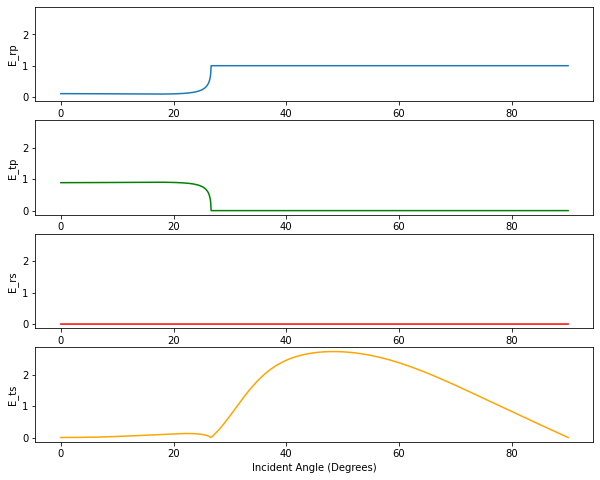

In [2]:
#DEFINE VARIABLES
A_0 = 1 #Incident Amplitude
alpha_1 = 2000 #m/s (P-wave velocity in medium 1)
beta_1 = 1070 #m/s (S-wave velocity in medium 1)
rho_1 = 2000 #kg/m**3 (density of medium 1)

alpha_2 = 4000 #m/s (P-wave velocity in medium 2)
beta_2 = 2310 #m/s (S-wave velocity in medium 2)
rho_2 = 2500 #kg/m**3 (density of medium 2)

#DEFINE EQUATIONS
#equations derived from snell's law
theta_1 = np.linspace(0.0001,1.5708,100000) #let theta_1 = 90 for testing
theta_1_degrees = np.linspace(0,90,100000)
A_1 = []
B_1 = []
A_2 = []
B_2 = []

E_rs = []
E_tp = []
E_ts = []

#DEFINE THE NORMALIZED MATRIX

for i in range(0,len(theta_1)):
    theta_2 = cmath.asin((alpha_2/alpha_1)*cmath.sin(theta_1[i]))
    delta_1 = cmath.asin((beta_1/alpha_1)*cmath.sin(theta_1[i]))
    delta_2 = cmath.asin((beta_2/alpha_1)*cmath.sin(theta_1[i]))

    row_1 = [cmath.cos(theta_1[i]),-1*cmath.sin(delta_1),cmath.cos(theta_2),cmath.sin(delta_2)]
    row_2 = [-1*cmath.sin(theta_1[i]),-1*cmath.cos(delta_1),cmath.sin(theta_2),-1*cmath.cos(delta_2)]
    row_3 = [-1*rho_1*alpha_1*cmath.cos(2*delta_1),beta_1*rho_1*cmath.sin(2*delta_1),rho_2*alpha_2*cmath.cos(2*delta_2),rho_2*beta_2*cmath.sin(2*delta_1)]
    row_4 = [beta_1*beta_1*alpha_2*rho_1*cmath.sin(2*theta_1[i]),rho_1*alpha_1*alpha_2*beta_1*cmath.cos(2*delta_1),beta_2*beta_2*rho_2*alpha_1*cmath.sin(2*theta_2),-1*rho_2*beta_2*alpha_1*alpha_2*cmath.cos(2*delta_2)]

    matrix = np.array([row_1,row_2,row_3,row_4]) #normalized zoeppritz matrix
    b = [cmath.cos(theta_1[i]),cmath.sin(theta_1[i]),rho_1*alpha_1*cmath.cos(2*delta_1),beta_1*beta_1*alpha_2*rho_1*cmath.sin(2*theta_1[i])] #  b vector in A*x = b
    x = scipy.linalg.solve(matrix,b)
    A_1.append(x[0])
    B_1.append(x[1])
    A_2.append(x[2])
    B_2.append(x[3])
    A_1[i] = A_1[i]*np.conjugate(A_1[i])
    B_1[i] = B_1[i]*np.conjugate(B_1[i])
    A_2[i] = A_2[i]*np.conjugate(A_2[i])
    B_2[i] = B_2[i]*np.conjugate(B_2[i])
    E_rs.append((beta_1*cmath.cos(delta_1)*B_1[i])/(alpha_1*cmath.cos(theta_1[i])))
    E_tp.append((rho_2*alpha_2*cmath.cos(theta_2)*A_2[i])/(rho_1*alpha_1*cmath.cos(theta_1[i])))
    E_ts.append((rho_2*beta_2*cmath.cos(delta_2)*B_2[i])/(rho_1*alpha_1*cmath.cos(theta_1[i])))

E_rp = A_1


fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10, 8),sharey=True)
print("Energy Flux of Reflected and Transmitted S and P waves as a function of Incident Angle")

ax1.set_xlabel('Incident Angle (Degrees)')
ax2.set_xlabel('Incident Angle (Degrees)')
ax3.set_xlabel('Incident Angle (Degrees)')
ax4.set_xlabel('Incident Angle (Degrees)')

ax1.set_ylabel('E_rp')
ax2.set_ylabel('E_tp')
ax3.set_ylabel('E_rs')
ax4.set_ylabel('E_ts')

ax1.plot(theta_1_degrees,E_rp)
ax2.plot(theta_1_degrees,E_tp,color="g")
ax3.plot(theta_1_degrees,E_rs,color="r")
ax4.plot(theta_1_degrees,E_ts,color="orange")
